# EMD examples

Examples of the Empirical Mode Decomposition (EMD) for each type of bearing using the [_emd_](https://emd.readthedocs.io/en/stable/index.html) library

## Import libraries

In [39]:
import scipy.io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emd

## Load data

One bearing for each type for example

In [40]:
# normal
k001 = scipy.io.loadmat('C:\\Users\\julia\\Documents\\UNICAMP\\TCC\\KAT\\K001\\N09_M07_F10_K001_1.mat',appendmat=False)['N09_M07_F10_K001_1']['Y']

vibration = k001[0][0][0][6][2][0]
phase_current_1 = k001[0][0][0][1][2][0]
phase_current_2 = k001[0][0][0][2][2][0]

d = dict(vibration = vibration, phase_current_1 = phase_current_1, phase_current_2 = phase_current_2)

df_k001 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
df_k001['bearing'] = 'k001'

In [41]:
# artificially damage
ka01 = scipy.io.loadmat('C:\\Users\\julia\\Documents\\UNICAMP\\TCC\\KAT\\KA01\\N09_M07_F10_KA01_1.mat',appendmat=False)['N09_M07_F10_KA01_1']['Y']

vibration = ka01[0][0][0][6][2][0]
phase_current_1 = ka01[0][0][0][1][2][0]
phase_current_2 = ka01[0][0][0][2][2][0]

d = dict(vibration = vibration, phase_current_1 = phase_current_1, phase_current_2 = phase_current_2)

df_ka01 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
df_ka01['bearing'] = 'ka01'

In [42]:
# accelerated lifetime
ka04 = scipy.io.loadmat('C:\\Users\\julia\\Documents\\UNICAMP\\TCC\\KAT\\KA04\\N09_M07_F10_KA04_1.mat',appendmat=False)['N09_M07_F10_KA04_1']['Y']

vibration = ka04[0][0][0][6][2][0]
phase_current_1 = ka04[0][0][0][1][2][0]
phase_current_2 = ka04[0][0][0][2][2][0]

d = dict(vibration = vibration, phase_current_1 = phase_current_1, phase_current_2 = phase_current_2)

df_ka04 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
df_ka04['bearing'] = 'ka01'

In [43]:
def apply_EMD(n_imfs,array):

  # get imfs
  imfs = emd.sift.mask_sift(array, max_imfs=n_imfs)

  arrays_emd = []

  for i in range(n_imfs):
    arrays_emd.append(imfs[:,i])

  return arrays_emd

## Normal

In [44]:
# Empirical Mode Decomposition

k001_emd = apply_EMD(5,df_k001['vibration'].values)

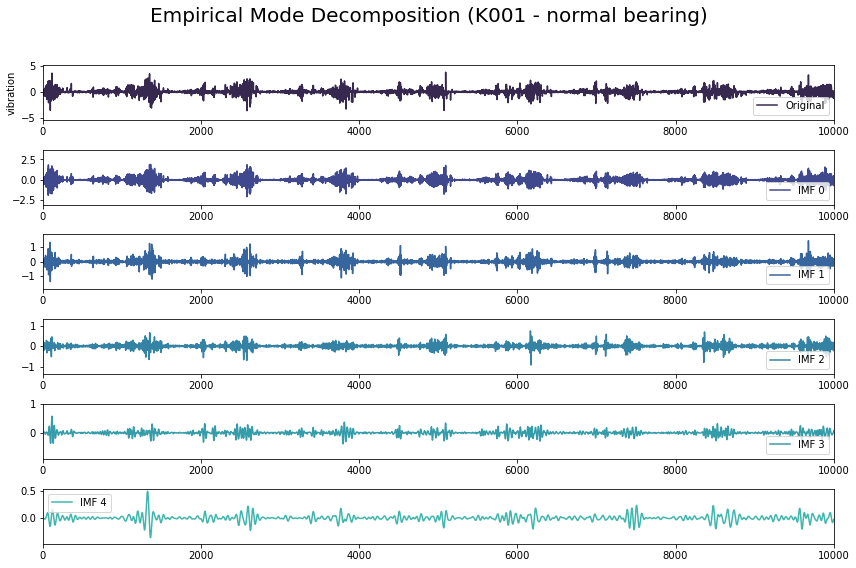

In [45]:
# Show the results for the first time series and its subseries
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(12, 8))

cmap = sns.color_palette("mako",20)

sns.lineplot(df_k001['vibration'], label='Original',ax=ax[0],color=cmap[3])
ax[0].set_xlim(0,10000)
ax[0].legend(loc="lower right")

for i in range(5):
    sns.lineplot(k001_emd[i], label=f"IMF {i}", ax=ax[i+1],color=cmap[6+2*i])
    ax[i+1].set_xlim(0,10000)
    ax[i+1].legend(loc="lower right")

plt.suptitle('Empirical Mode Decomposition (K001 - normal bearing)', fontsize=20)
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

## Artificial damaged

In [46]:
# Empirical Mode Decomposition

ka01_emd = apply_EMD(5,df_ka01['vibration'].values)

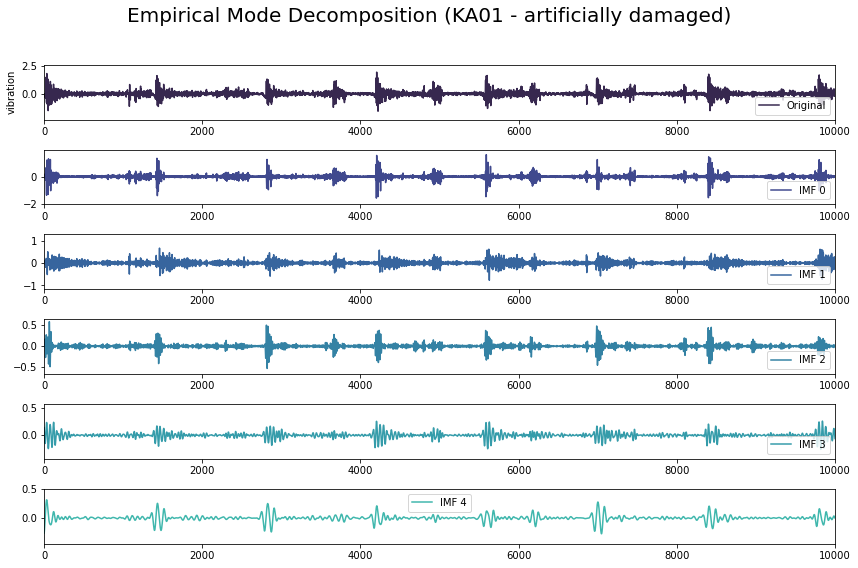

In [47]:
# Show the results for the first time series and its subseries
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(12, 8))

cmap = sns.color_palette("mako",20)

sns.lineplot(df_ka01['vibration'], label='Original',ax=ax[0],color=cmap[3])
ax[0].set_xlim(0,10000)
ax[0].legend(loc="lower right")

for i in range(5):
    sns.lineplot(ka01_emd[i], label=f"IMF {i}", ax=ax[i+1],color=cmap[6+2*i])
    ax[i+1].set_xlim(0,10000)
    ax[i+1].legend(loc="lower right")

plt.suptitle('Empirical Mode Decomposition (KA01 - artificially damaged)', fontsize=20)
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

## Accelerated lifetime

In [48]:
# Empirical Mode Decomposition

ka04_emd = apply_EMD(5,df_ka04['vibration'].values)

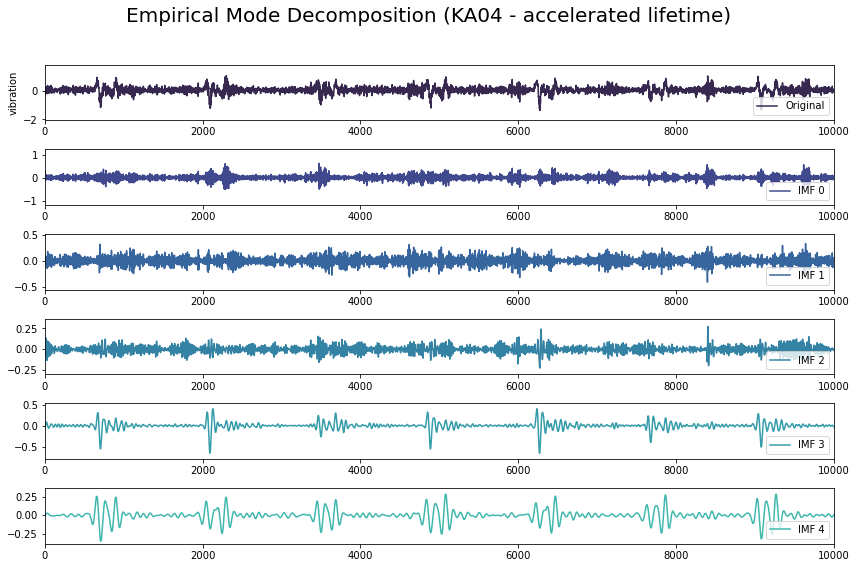

In [49]:
# Show the results for the first time series and its subseries
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(12, 8))

cmap = sns.color_palette("mako",20)

sns.lineplot(df_ka04['vibration'], label='Original',ax=ax[0],color=cmap[3])
ax[0].set_xlim(0,10000)
ax[0].legend(loc="lower right")

for i in range(5):
    sns.lineplot(ka04_emd[i], label=f"IMF {i}", ax=ax[i+1],color=cmap[6+2*i])
    ax[i+1].set_xlim(0,10000)
    ax[i+1].legend(loc="lower right")

plt.suptitle('Empirical Mode Decomposition (KA04 - accelerated lifetime)', fontsize=20)
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()